In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import MySQLdb

In [2]:
def mean_calc(df):
    mean_list = []
    for i in range(0,11):
        mean_list.append(calculate_mean(df.iloc[:,2:13].values[:,i]))
    return mean_list

In [3]:
def normal_bar(values1,labels,title):
    fig, ax = plt.subplots()
    bar_width = 0.35
    opacity = 0.8
    plt.bar(np.arange(len(values1)), values1, bar_width, alpha=opacity)
    plt.xticks(np.arange(len(values1)), labels)
    plt.title(title)
    plt.legend()
    plt.show()
    return
    

In [4]:
def sus_bar(df1,df2,df3,df4, title):
    '''
    labels = ['I liked the design of the site',
              'The design of this site was similar too other news sites',
              'I think that I would like to use this site frequently',
              'I thought the site was easy to use',
              'The design of this site was unusual to me',
              'I thought there was too much inconsistency in this site',
              'I felt very confident using the site',
              'I thought the material i was looking for was easy to find',
              'I found the site very cumbersome to use',
              'I thought that the amount of information on this site was too sparse',
              'I felt overwhelmed using this site']
    '''
    labels = range(1,12)
    mean_list1 = mean_calc(df1)
    mean_list2 = mean_calc(df2)
    mean_list3 = mean_calc(df3)
    mean_list4 = mean_calc(df4)
    
    bar_width = 0.2
    opacity = 0.8
    plt.figure(figsize=(30, 15))
    plt.bar(np.arange(len(mean_list1))-(bar_width+bar_width/2), mean_list1, bar_width, alpha=opacity, label='QQ, zh')
    plt.bar(np.arange(len(mean_list2))-bar_width/2, mean_list2, bar_width, alpha=opacity, label='QQ, En')
    plt.bar(np.arange(len(mean_list3))+bar_width/2, mean_list3, bar_width, alpha=opacity, label='BBC, Zh')
    plt.bar(np.arange(len(mean_list4))+(bar_width+bar_width/2), mean_list4, bar_width, alpha=opacity, label='BBC, En')
    plt.xticks(np.arange(len(mean_list1)), labels)
    plt.autoscale(tight=False)
    plt.title(title)
    plt.legend()
    plt.show()
    return


In [5]:
def show_bar_chart(values1,values2, labels,title):
    
    fig, ax = plt.subplots()
    bar_width = 0.35
    opacity = 0.8
    plt.bar(np.arange(len(values1))-bar_width/2, values1, bar_width, alpha=opacity,label='English')
    plt.bar(np.arange(len(values1))+bar_width/2, values2, bar_width, alpha=opacity,label='Chinese')
    plt.xticks(np.arange(len(values1)), labels)
    plt.title(title)
    plt.legend()
    plt.show()
    return

In [6]:
def calculate_mean(alist):
    value = sum(alist)/len(alist)
    
    return value

# Data
Stuff here


In [7]:
q_bbc_en = pd.read_csv('/Users/marcusliljenberg/Documents/ExJobb/Data/finished/questions_main_bbc_en.csv')
q_qq_en = pd.read_csv('/Users/marcusliljenberg/Documents/ExJobb/Data/finished/questions_main_qq_en.csv')
q_bbc_zh = pd.read_csv('/Users/marcusliljenberg/Documents/ExJobb/Data/finished/questions_main_bbc_zh.csv')
q_qq_zh = pd.read_csv('/Users/marcusliljenberg/Documents/ExJobb/Data/finished/questions_main_qq_zh.csv')
actions = pd.read_csv('/Users/marcusliljenberg/Documents/ExJobb/Data/finished/actions.csv')

In [121]:


mysql_cn= MySQLdb.connect(host='aa1fk59xwsw9wmv.cg05xtnsvhwq.ap-northeast-2.rds.amazonaws.com', 
                port=3306,user='Marcus', passwd='marcusl36', 
                db='ebdb')
q_bbc_en = pd.read_sql('SELECT Questions.*, Main.Site, Main.Language, Main.Gender, Main.Age, QuestionText.FPattern FROM Questions Join Main ON Questions.MainId = Main.Id Join QuestionText ON Questions.QuestionId = QuestionText.id where Age < 70  and Main.Site = "bbc" and Main.Language = "en" and Questions.MainId != 55;', con=mysql_cn)  
q_bbc_zh = pd.read_sql('SELECT Questions.*, Main.Site, Main.Language, Main.Gender, Main.Age, QuestionText.FPattern FROM Questions Join Main ON Questions.MainId = Main.Id Join QuestionText ON Questions.QuestionId = QuestionText.id where Age < 70  and Main.Site = "bbc" and Main.Language = "zh" and Questions.MainId != 101 and Questions.MainId != 125 and Questions.MainId != 176 and Questions.Id != 148 and Questions.Id != 149 and Questions.Id != 150 and Questions.Id != 151 and Questions.Id != 152 and Questions.Id != 153 and Questions.Id != 154 and Questions.Id != 155 and Questions.Id != 156;', con=mysql_cn)  
q_qq_en = pd.read_sql('SELECT Questions.*, Main.Site, Main.Language, Main.Gender, Main.Age, QuestionText.FPattern FROM Questions Join Main ON Questions.MainId = Main.Id Join QuestionText ON Questions.QuestionId = QuestionText.id where Age < 70  and Main.Site = "qq" and Main.Language = "en";', con=mysql_cn)  
q_qq_zh = pd.read_sql('SELECT Questions.*, Main.Site, Main.Language, Main.Gender, Main.Age, QuestionText.FPattern FROM Questions Join Main ON Questions.MainId = Main.Id Join QuestionText ON Questions.QuestionId = QuestionText.id where Age < 70  and Main.Site = "qq" and Main.Language = "zh" and Questions.MainId != 146 and Questions.MainId != 181;', con=mysql_cn)  

q_qq_zh_sus = pd.read_sql("SELECT Sus.*, Main.* FROM Sus Join Main ON Sus.MainId = Main.id  where Age < 70 and Site = 'qq' and Language = 'zh';", con=mysql_cn)  
q_qq_en_sus = pd.read_sql("SELECT Sus.*, Main.* FROM Sus Join Main ON Sus.MainId = Main.id  where Age < 70 and Site = 'qq' and Language = 'en';", con=mysql_cn)  
q_bbc_en_sus = pd.read_sql("SELECT Sus.*, Main.* FROM Sus Join Main ON Sus.MainId = Main.id  where Age < 70 and Site = 'bbc' and Language = 'en';", con=mysql_cn)  
q_bbc_zh_sus = pd.read_sql("SELECT Sus.*, Main.* FROM Sus Join Main ON Sus.MainId = Main.id  where Age < 70 and Site = 'bbc' and Language = 'zh';", con=mysql_cn)  

mysql_cn.close()

In [122]:
mysql_cn= MySQLdb.connect(host='aa1fk59xwsw9wmv.cg05xtnsvhwq.ap-northeast-2.rds.amazonaws.com', 
                port=3306,user='Marcus', passwd='marcusl36', 
                db='ebdb')

users = pd.read_sql("SELECT Sus.Id, Main.Age, Main.Gender, Main.Site, Main.Language FROM Sus Join Main ON Sus.MainId = Main.id  where Age < 70;", con=mysql_cn)
male_users = pd.read_sql("SELECT Sus.Id, Main.Age, Main.Gender, Main.Site, Main.Language FROM Sus Join Main ON Sus.MainId = Main.id  where Age < 70 and Gender = 0;", con=mysql_cn)
mysql_cn.close()

In [123]:
desc = q_bbc_en.drop(['StartTime', 'EndTime','Id','QuestionId','MainId','Age','FPattern'], axis=1)
desc.describe()

,Correct,Time,Gender
count,377.000000,377.000000,377.000000
mean,0.875332,25.310345,0.206897
std,0.330782,52.967289,0.405619
min,0.000000,0.000000,0.000000
25%,1.000000,7.000000,0.000000
50%,1.000000,14.000000,0.000000
75%,1.000000,29.000000,0.000000
max,1.000000,925.000000,1.000000


In [124]:
desc = q_bbc_zh.drop(['StartTime', 'EndTime','Id','QuestionId','MainId','Age','FPattern'], axis=1)
desc.describe()

,Correct,Time,Gender
count,264.000000,264.000000,264.000000
mean,0.761364,27.117424,0.556818
std,0.427060,38.464905,0.497705
min,0.000000,1.000000,0.000000
25%,1.000000,8.000000,0.000000
50%,1.000000,16.000000,1.000000
75%,1.000000,31.000000,1.000000
max,1.000000,438.000000,1.000000


In [125]:
desc = q_qq_en.drop(['StartTime', 'EndTime','Id','QuestionId','MainId','Age','FPattern'], axis=1)
desc.describe()

,Correct,Time,Gender
count,403.000000,403.000000,403.000000
mean,0.866005,19.258065,0.193548
std,0.341070,24.265076,0.395570
min,0.000000,0.000000,0.000000
25%,1.000000,6.000000,0.000000
50%,1.000000,10.000000,0.000000
75%,1.000000,21.000000,0.000000
max,1.000000,151.000000,1.000000


In [126]:
desc = q_qq_zh.drop(['StartTime', 'EndTime','Id','QuestionId','MainId','Age','FPattern'], axis=1)
desc.describe()

,Correct,Time,Gender
count,247.000000,247.000000,247.000000
mean,0.846154,22.485830,0.631579
std,0.361534,25.783471,0.483356
min,0.000000,1.000000,0.000000
25%,1.000000,7.000000,0.000000
50%,1.000000,12.000000,1.000000
75%,1.000000,26.500000,1.000000
max,1.000000,183.000000,1.000000


In [140]:
q_qq_zh.head()


,Id,MainId,QuestionId,Correct,StartTime,EndTime,Time,Site,Language,Gender,Age,FPattern
0,483,52,2,0,-1 days +23:59:59,19:38:00,18,qq,zh,0,26,1
1,833,96,2,1,-1 days +23:59:59,22:00:19,10,qq,zh,0,26,1
2,1015,150,2,1,-1 days +23:59:59,17:05:20,29,qq,zh,1,26,1
3,1060,156,2,1,-1 days +23:59:59,17:19:49,13,qq,zh,0,20,1
4,1080,168,2,1,-1 days +23:59:59,17:29:16,10,qq,zh,0,20,1


In [128]:
q_bbc_en_sus.head()

,Id,MainId,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,Question11,Sum,Id,Site,Language,Gender,Age
0,2,3,5,3,2,4,2,2,4,2,5,3,4,36,3,bbc,en,0,26
1,4,5,4,4,4,3,3,4,3,3,4,2,2,36,5,bbc,en,0,56
2,6,7,3,4,3,4,2,4,3,4,2,2,2,33,7,bbc,en,1,26
3,9,17,3,4,3,3,3,3,3,3,3,3,1,32,17,bbc,en,0,26
4,11,20,4,5,3,5,2,2,5,5,2,2,1,36,20,bbc,en,0,26


In [129]:
users.head()

,Id,Age,Gender,Site,Language
0,1,26,0,qq,en
1,2,26,0,bbc,en
2,3,20,0,qq,en
3,4,56,0,bbc,en
4,5,26,0,qq,en


Total number of users: 101

Male users:   63 
Female users: 38

English users: 59
Chinese users: 42


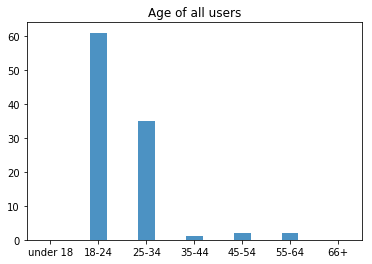

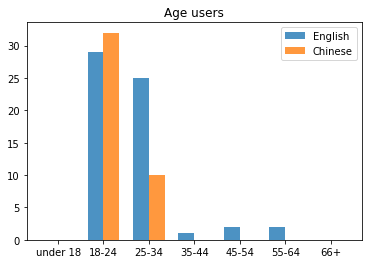

In [130]:
print('Total number of users: {0}'.format(len(users)))

print('\nMale users:   {0} \nFemale users: {1}'.format(len(male_users),(len(users)-len(male_users))))


user_dict = dict()
user_dict[17] = 0
user_dict[20] = 0
user_dict[26] = 0
user_dict[36] = 0
user_dict[46] = 0
user_dict[56] = 0
user_dict[66] = 0
user_dict_en = dict()
user_dict_en[17] = 0
user_dict_en[20] = 0
user_dict_en[26] = 0
user_dict_en[36] = 0
user_dict_en[46] = 0
user_dict_en[56] = 0
user_dict_en[66] = 0
user_dict_zh = dict()
user_dict_zh[17] = 0
user_dict_zh[20] = 0
user_dict_zh[26] = 0
user_dict_zh[36] = 0
user_dict_zh[46] = 0
user_dict_zh[56] = 0
user_dict_zh[66] = 0

for user in users.values:
    user_dict[user[1]] += 1
    if(user[-1]=='en'):
        user_dict_en[user[1]] += 1
    else:
        user_dict_zh[user[1]] += 1
        
print('\nEnglish users: {0}'.format(sum(user_dict_en.values())));
print('Chinese users: {0}'.format(sum(user_dict_zh.values())));
    
user_label = ['under 18', '18-24','25-34','35-44','45-54','55-64','66+']
normal_bar(user_dict.values(),user_label, 'Age of all users')

show_bar_chart(user_dict_en.values(), user_dict_zh.values(),user_label, 'Age users')




# Data Cleaning

In [131]:
# Users where everything was incorrect
# Already fixed might be intresting to have in report
'''
mysql_cn= MySQLdb.connect(host='aa1fk59xwsw9wmv.cg05xtnsvhwq.ap-northeast-2.rds.amazonaws.com', 
                port=3306,user='Marcus', passwd='marcusl36', 
                db='ebdb')
incorrect_users = pd.read_sql('SELECT Main.Id FROM Questions Join Main ON Questions.MainId = Main.Id  where Age < 70 and correct = 0', con=mysql_cn)  

mysql_cn.close()
'''

In [133]:
'''
incorrect = dict()
for i in incorrect_users.values[:,0]:
    incorrect[i] = 0
for i in incorrect_users.values[:,0]:
    incorrect[i] += 1
bad_users = []
for key,value in incorrect.items():
    if(value >= 10):
        print('{0}:{1}'.format(key,value))
        bad_users.append(key)
print(bad_users)
bad_rows = list(range(148,157))
print(bad_rows)
print('I made sure to not select these rows for the data later')
'''

55:13
101:17
125:39
146:13
181:13
276:13
[55, 101, 125, 146, 181, 276]
[148, 149, 150, 151, 152, 153, 154, 155, 156]
I made sure to not select these rows for the data later


In [134]:
# Deleting all instances where the above occur

print(len(q_bbc_zh['Id']))


264


# Analysis of the Questions

In [135]:

q_text_id_qq_en_correct = dict()
q_text_id_qq_zh_correct = dict()
q_text_id_bbc_en_correct = dict()
q_text_id_bbc_zh_correct = dict()

q_text_id_qq_en_time = dict()
q_text_id_qq_zh_time = dict()
q_text_id_bbc_en_time = dict()
q_text_id_bbc_zh_time = dict()

for i in range(1,27):
    if(i%2==1):
        q_text_id_qq_en_correct[i] = 0
        q_text_id_qq_en_time[i] = 0
    else:
        q_text_id_qq_zh_correct[i] = 0
        q_text_id_qq_zh_time[i] = 0
        
for i in range(27,53):
    if(i%2==1):
        q_text_id_bbc_en_correct[i] = 0
        q_text_id_bbc_en_time[i] = 0
    else:
        q_text_id_bbc_zh_correct[i] = 0
        q_text_id_bbc_zh_time[i] = 0

In [144]:
bbc_zh_length = 0
bbc_en_length = 0
qq_zh_length = 0
qq_en_length = 0

#Data needs to be cleaned

#question number 13 for qq does not seem to work either
for i in q_bbc_en.values:
    if(actions.loc[actions['QuestionsId'] == int(i[2])]['ScreenWidth'].item() > 1000):
        q_text_id_bbc_en_correct[(i[2])] += int(i[3])
        if(int(i[3])==1 and i[6] < 400):
            q_text_id_bbc_en_time[(i[2])] += int(i[6])
        bbc_en_length += 1
    
for i in q_bbc_zh.values:
    if(actions.loc[actions['QuestionsId'] == int(i[2])]['ScreenWidth'].item() > 1000):
        bbc_zh_length += 1
        q_text_id_bbc_zh_correct[(i[2])] += int(i[3])
        if(int(i[3])==1 and i[6] < 400):
            q_text_id_bbc_zh_time[(i[2])] += int(i[6])
    
for i in q_qq_en.values:
    if(actions.loc[actions['QuestionsId'] == int(i[2])]['ScreenWidth'].item() > 1000):
        qq_en_length += 1
        if int(i[2]) is 23:
            q_text_id_qq_en_correct[(i[2])] += 1
            if(i[6] < 400):
                q_text_id_qq_en_time[(i[2])] += int(i[6])
        q_text_id_qq_en_correct[(i[2])] += int(i[3])
        if(int(i[3])==1 and i[6] < 400):
            q_text_id_qq_en_time[(i[2])] += int(i[6])
    
for i in q_qq_zh.values:
    if(actions.loc[actions['QuestionsId'] == int(i[2])]['ScreenWidth'].item() > 1000):
        qq_zh_length += 1
        q_text_id_qq_zh_correct[(i[2])] += int(i[3])
        if(int(i[3])==1 and i[6] < 400):
            q_text_id_qq_zh_time[(i[2])] += int(i[6])
    
bbc_zh_length = bbc_zh_length/13
bbc_en_length = bbc_en_length/13
qq_zh_length = qq_zh_length/13
qq_en_length = qq_en_length/13

print(' ')
print('BBC number of replies, en: {0}'.format(bbc_en_length))
print('BBC number of replies, zh: {0}'.format(bbc_zh_length))
print('QQ number of replies, en: {0}'.format(qq_en_length))
print('QQ number of replies, zh: {0}'.format(qq_zh_length))

 
BBC number of replies, en: 29.0
BBC number of replies, zh: 20.307692307692307
QQ number of replies, en: 31.0
QQ number of replies, zh: 19.0


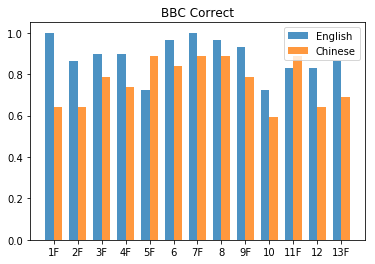

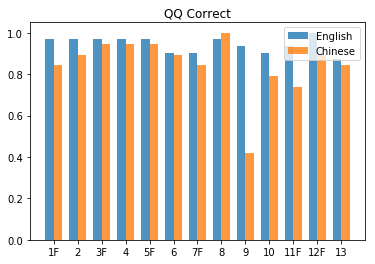

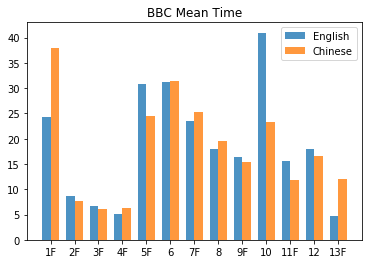

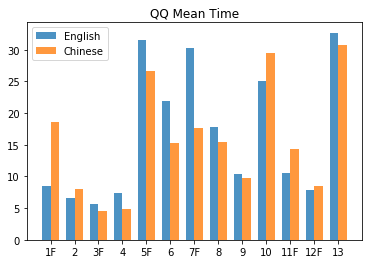

Correct answers
BBC en: 88%
BBC zh: 76%

QQ en:  94%
QQ zh:  85%

Mean times for correct answers
BBC mean time en: 243.72
BBC mean time zh: 237.55

QQ mean time en:  216.39
QQ mean time zh:  203.47


In [145]:
bbc_labels = ['1F', '2F', '3F', '4F', '5F', '6', '7F','8','9F','10','11F', '12', '13F']
qq_labels = ['1F', '2', '3F', '4', '5F', '6', '7F','8','9','10','11F', '12F', '13']
show_bar_chart([val/bbc_en_length for val in q_text_id_bbc_en_correct.values()],
               [val/bbc_zh_length for val in q_text_id_bbc_zh_correct.values()], bbc_labels, 'BBC Correct')
show_bar_chart([val/qq_en_length for val in q_text_id_qq_en_correct.values()],
               [val/qq_zh_length for val in q_text_id_qq_zh_correct.values()], qq_labels, 'QQ Correct')

show_bar_chart([val/bbc_en_length for val in q_text_id_bbc_en_time.values()],
               [val/bbc_zh_length for val in q_text_id_bbc_zh_time.values()], bbc_labels, 'BBC Mean Time')
show_bar_chart([val/qq_en_length for val in q_text_id_qq_en_time.values()],
               [val/qq_zh_length for val in q_text_id_qq_zh_time.values()], qq_labels, 'QQ Mean Time')
print('Correct answers')
print('BBC en: {0:.0%}'.format(sum(q_text_id_bbc_en_correct.values())/(bbc_en_length*13)))
print('BBC zh: {0:.0%}'.format(sum(q_text_id_bbc_zh_correct.values())/(13*bbc_zh_length)))
print('\nQQ en:  {0:.0%}'.format(sum(q_text_id_qq_en_correct.values())/(13*qq_en_length)))
print('QQ zh:  {0:.0%}'.format(sum(q_text_id_qq_zh_correct.values())/(13*qq_zh_length)))

print('\nMean times for correct answers')
print('BBC mean time en: {0:.2f}'.format(sum([val/bbc_en_length for val in q_text_id_bbc_en_time.values()])))
print('BBC mean time zh: {0:.2f}'.format(sum([val/bbc_zh_length for val in q_text_id_bbc_zh_time.values()])))
print('\nQQ mean time en:  {0:.2f}'.format(sum([val/qq_en_length for val in q_text_id_qq_en_time.values()])))
print('QQ mean time zh:  {0:.2f}'.format(sum([val/qq_zh_length for val in q_text_id_qq_zh_time.values()])))


# Add % of correct results maby in a circle graph

# Sus Analysis

In [22]:
q_qq_zh_sus.describe()

,Id,MainId,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,Question11,Sum,Id,Gender,Age
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,83.714286,211.333333,2.523810,3.904762,2.190476,2.476190,2.714286,3.095238,2.523810,2.380952,3.476190,2.428571,2.809524,30.523810,211.333333,0.666667,21.428571
std,17.277566,71.773486,0.872872,0.943650,0.872872,1.030488,1.007118,1.091089,0.928388,1.116969,1.077917,0.810643,1.249762,3.203421,71.773486,0.483046,2.618615
min,35.000000,52.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,52.000000,0.000000,20.000000
25%,75.000000,164.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,28.000000,164.000000,0.000000,20.000000
50%,84.000000,193.000000,2.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,3.000000,31.000000,193.000000,1.000000,20.000000
75%,97.000000,271.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,32.000000,271.000000,1.000000,20.000000
max,105.000000,299.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,38.000000,299.000000,1.000000,26.000000


In [23]:
q_qq_en_sus.describe()

,Id,MainId,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,Question11,Sum,Id,Gender,Age
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,33.833333,56.166667,1.600000,1.966667,1.333333,1.600000,3.733333,3.666667,2.100000,1.733333,3.933333,2.333333,4.233333,28.233333,56.166667,0.200000,24.000000
std,19.552023,37.369620,0.813676,0.927857,0.606478,0.855006,1.112107,1.154701,1.155198,1.048261,1.229896,1.538771,1.135124,4.264394,37.369620,0.406838,6.746647
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,2.000000,0.000000,20.000000
25%,18.500000,31.500000,1.000000,1.000000,1.000000,1.000000,3.250000,3.000000,1.000000,1.000000,3.000000,1.000000,4.000000,26.000000,31.500000,0.000000,20.000000
50%,35.000000,52.500000,1.000000,2.000000,1.000000,1.000000,4.000000,4.000000,2.000000,1.000000,4.000000,2.000000,5.000000,27.500000,52.500000,0.000000,23.000000
75%,48.500000,73.500000,2.000000,2.750000,1.750000,2.000000,4.000000,5.000000,3.000000,2.000000,5.000000,3.000000,5.000000,30.000000,73.500000,0.000000,26.000000
max,68.000000,148.000000,4.000000,4.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,37.000000,148.000000,1.000000,56.000000


In [24]:
q_bbc_zh_sus.describe()

,Id,MainId,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,Question11,Sum,Id,Gender,Age
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,78.619048,192.476190,2.952381,3.238095,2.333333,3.142857,2.523810,2.714286,2.904762,2.904762,3.047619,2.904762,2.714286,31.380952,192.476190,0.571429,21.428571
std,19.742027,72.527663,0.740013,1.044259,0.577350,1.152637,0.980767,0.717137,0.943650,1.179185,1.244033,1.135991,1.146423,2.673503,72.527663,0.507093,2.618615
min,10.000000,18.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,18.000000,0.000000,20.000000
25%,72.000000,159.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,30.000000,159.000000,0.000000,20.000000
50%,83.000000,192.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,32.000000,192.000000,1.000000,20.000000
75%,91.000000,254.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,33.000000,254.000000,1.000000,20.000000
max,101.000000,278.000000,4.000000,5.000000,3.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,35.000000,278.000000,1.000000,26.000000


In [25]:
q_bbc_en_sus.describe()

,Id,MainId,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,Question11,Sum,Id,Gender,Age
count,29.000000,29.00000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.00000,29.000000,29.000000
mean,31.241379,49.00000,2.344828,3.448276,1.965517,2.724138,2.413793,2.896552,2.758621,2.482759,3.068966,2.689655,2.758621,29.551724,49.00000,0.206897,25.862069
std,17.837871,29.63468,1.078221,0.736120,0.905647,1.161789,1.052794,1.144703,1.122980,1.271127,1.222732,1.227758,1.243703,3.631078,29.63468,0.412251,9.070061
min,2.000000,3.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,3.00000,0.000000,20.000000
25%,16.000000,26.00000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,27.000000,26.00000,0.000000,20.000000
50%,31.000000,46.00000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,29.000000,46.00000,0.000000,26.000000
75%,45.000000,67.00000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,32.000000,67.00000,0.000000,26.000000
max,65.000000,132.00000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,36.000000,132.00000,1.000000,56.000000


In [26]:

print('QQ, Zh sus mean: {0}'.format(calculate_mean(q_qq_zh_sus['Sum'])))
print('QQ, En sus mean: {0}'.format(calculate_mean(q_qq_en_sus['Sum'])))
print('')

print('BBC, Zh sus mean: {0}'.format(calculate_mean(q_bbc_zh_sus['Sum'])))
print('BBC, En sus mean: {0}'.format(calculate_mean(q_bbc_en_sus['Sum'])))



QQ, Zh sus mean: 30.523809523809526
QQ, En sus mean: 28.233333333333334

BBC, Zh sus mean: 31.38095238095238
BBC, En sus mean: 29.551724137931036


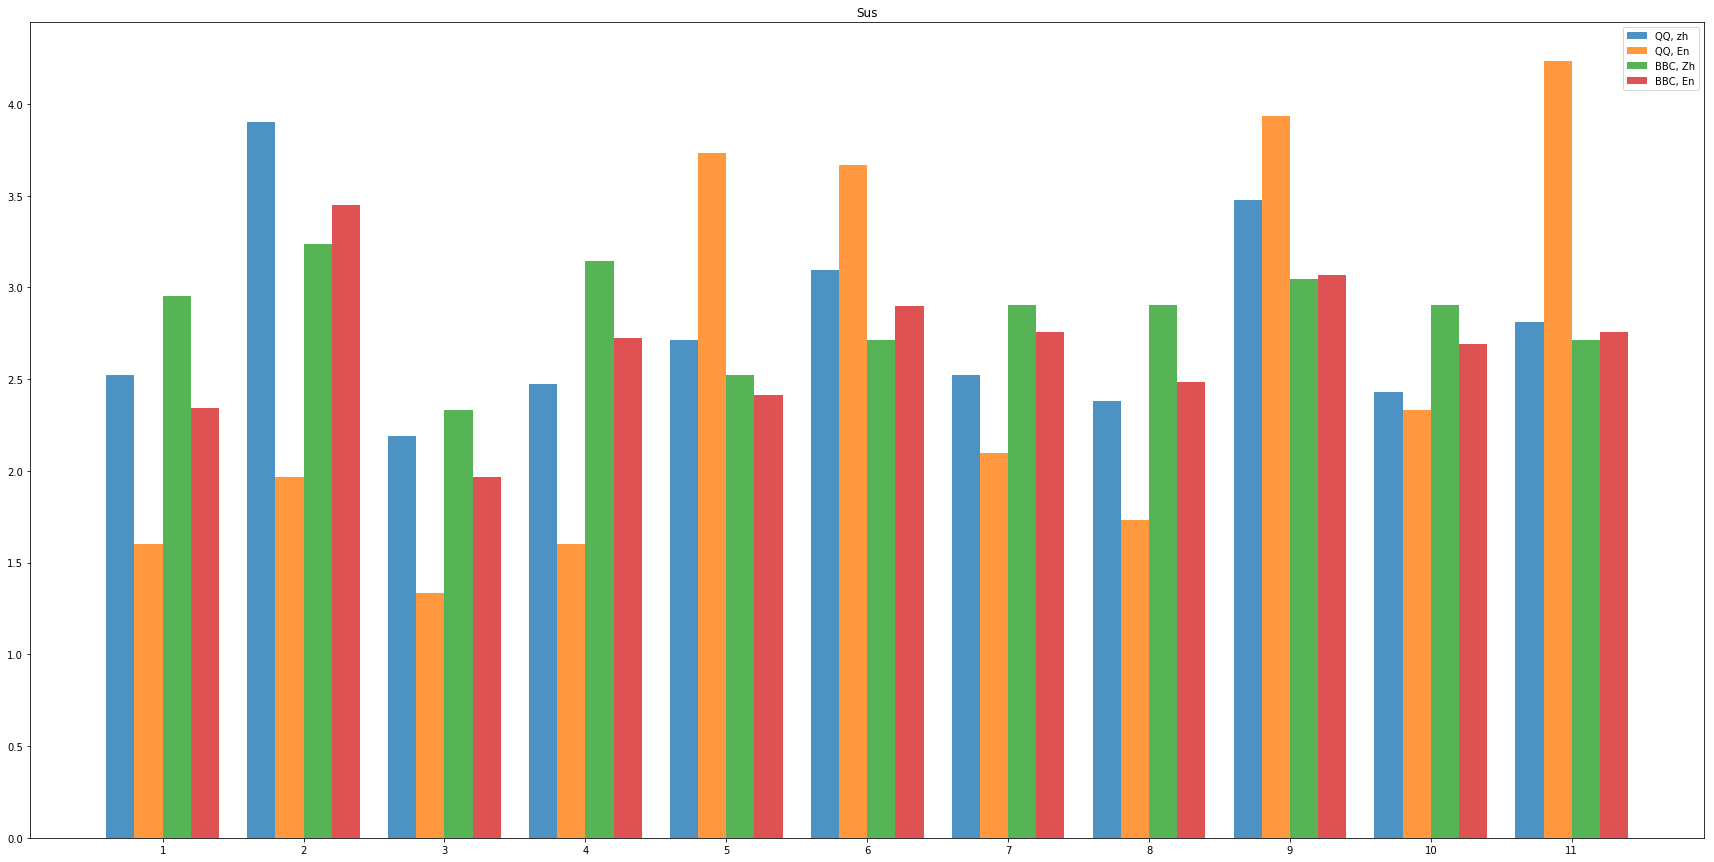

In [27]:
sus_bar(q_qq_zh_sus, q_qq_en_sus, q_bbc_zh_sus, q_bbc_en_sus, 'Sus')

### Questions:
1. I liked the design of the site
2. The design of this site was similar too other news sites
3. I think that I would like to use this site frequently
4. I thought the site was easy to use
5. The design of this site was unusual to me
6. I thought there was too much inconsistency in this site
7. I felt very confident using the site
8. I thought the material i was looking for was easy to find
9. I found the site very cumbersome to use
10. I thought that the amount of information on this site was too sparse
11. I felt overwhelmed using this site


## Sus Conclusion
so far.. It seems like the chinese users over all was better at finding information on both sites. Also looking at the sus we can clearly see that chinese people found both sites similary difficult to use. English speakers on the other hand found the chinese inspired QQ site both harder to use and where also disliked the site quite a lot more than the bbc site. It should also be noted that the chinese users had lower correct scores. conitnue....


## 1. I liked the design of the site
Looking at this question we can se that the chinese users thought about the same for both sites:<br/>
<br/>
Chinise:<br/>
QQ: 2.52<br/>
BBC: 2.95<br/>
The english users on the other hand there could be seen quite a diffrence. The average for the QQ site was quite a lot lower than the average for the bbc page.<br/>
<br/>
English:<br/>
QQ: 1.6<br/>
BBC: 2.34<br/>
Over all the english speakers had higher requirements for the design of the page and disliked the BBC page more than then Chinese users. This is probobaly beacuse of a higher standard of website design in the west.

## 2. The design of this site was similar too other news sites
With the results from this question we can confirm that we managed to achive our goal of creating a websites that lookes similar to what the people from the diffrent cultures are used to.<br/>

Chinese users thought the QQ site looked very similar to what they usally see with a average of 3.9. English users thought this site did not look anything similar to what they usually encounter and had a average as low as 1.96.<br/>

Both English and Chinese users was fairly used to the design of the bbc site which makes sense since a lot of western sites are used in china. Their avereges where: Zh 3.2 and En 3.45.


## 3. I think that I would like to use this site frequently
All the diffrent sites except the english QQ users had around the same average on this question.<br/>
Zh QQ: 2.19<br/>
Zh BBC: 2.33<br/>
En BBC: 1.97<br/>

The English users that used the QQ sites thought significantly less of the site with a average of 1.33<br/>
En QQ: 1.33




## 4. I thought the site was easy to use
The BBC site got a significant higher value for this meaning on average all the users thought the Western news site was easier to use than the chinese counterpart. Chinese users still felt quite okey using the site compaired to their english speaking counterpart.<br/>

Zh QQ: 2.48<br/>
En QQ: 1.6<br/>
Zh BBC: 3.14<br/>
En BBC: 2.72<br/>

## 5. The design of this site was unusual to me
All the users except the english qq site found this site fairly usual.
<br/>

Zh QQ: 2.71<br/>
En QQ: 3.71<br/>
Zh BBC: 2.52<br/>
En BBC: 2.41<br/>


## 6. I thought there was too much inconsistency in this site
Users generaly thought the BBC site was more consistent than the QQ site with the users thinking that the En version of QQ has the highest inconsitensy. <br/>

Zh QQ: 3.1<br/>
En QQ: 3.67<br/>
Zh BBC: 2.71<br/>
En BBC: 2.89<br/>

## 7. I felt very confident using the site
The confidence levels of the sites were fairly low all under 3. QQ users felt less confident using the site than bbc users did.<br/>

Zh QQ: 2.52<br/>
En QQ: 2.1<br/>
Zh BBC: 2.9<br/>
En BBC: 2.76<br/>


## 8. I thought the material i was looking for was easy to find
The chinese users found the material they where looking for easier to find than their english counterparts on both pages. Over all the users found it easier to find material on the BBC page compared to the QQ one. English QQ users found it very hard to find information on the chinese inspired QQ site compared to the BBC site.
<br/>

Zh QQ: 2.38<br/>
En QQ: 1.73<br/>
Zh BBC: 2.9<br/>
En BBC: 2.48<br/>

## 9. I found the site very cumbersome to use
Users found the QQ site to be more cumbersome to use than the bbc site. Both Chinese and English BBC users have almost identical results(diffrence of only 0.02 points), meaning people from both diffrent cultures thought the site was equaly hard/easy to use.
<br/>

Zh QQ: 3.48<br/>
En QQ: 3.93<br/>
Zh BBC: 3.05<br/>
En BBC: 3.07<br/>

## 10. I thought that the amount of information on this site was too sparse
We can clearly see here that the users seemed to think that there is to much information on the QQ site and a pretty okey amount on the BBC site. Chinese user seem to have a larger tollerance for the amount of information on a page compared to the English speaking users.
<br/>

Zh QQ: 2.43<br/>
En QQ: 2.33<br/>
Zh BBC: 2.90<br/>
En BBC: 2.69<br/>

## 11. I felt overwhelmed using this site
We can here see that none of the users except the English QQ users felt overwelmed using this site. This is reasonable since Chinese users are used to this type of format and information density in webpages. For the English users using the QQ website the information density became a bit of a chock.
<br/>

Zh QQ: 2.8<br/>
En QQ: 4.23<br/>
Zh BBC: 2.71<br/>
En BBC: 2.76<br/>

## Calculating a score for the Sus
We calculate a Sum value for the Sus question this to make it easier to compare the diffrent models to each other and how well liked they are. The score will have a range between 0-10 where 10 is the heighest score a page can get and 0 the lowest. <br/>

To calculate this score we firstly remove the second question "The design of this site was similar too other news sites". This question has neither a positive or negative implication for the website and was made to see if the website were designed acording to the correct cultural criterias. <br/>

We then divide the questions into two groups. Question where a high score has a positive implication for the website ex: "I thought the site was easy to use". And questions where a high score has a negative implication, ex: "I found the site very cumbersome to use". <br/>

The positive questions are: 1,3,4,7,8.

The negative questions are: 5,6,9,10,11.

Question 6 is a special case where we first have to recalculate the values. This is done beacuse of the nature of the question: "I thought that the amount of information on this site was too sparse". A high value on this question is a negative answer and so is a low value. The most positive answer you can give on this question is 3. We recalculate the value using the following function: 2*abs(3-value)+1. This will give us the value 1 in case of value = 3 and 5 in the case of value = 1 or 5.

We then sum up the possitive averages and take then minus the negative sum. This value is then scaled from a range of -20 to 20. To a range of 0-10 instead. This is done by using the following formula: score = (value+20)/4. 



In [28]:
def calc_sus_score(df):
    pos = df['Question1'].mean() + df['Question3'].mean() + df['Question4'].mean()+ df['Question7'].mean() + df['Question8'].mean()
    neg = df['Question5'].mean() + df['Question6'].mean() + df['Question9'].mean() + ((2)*np.abs(3-df['Question10'].mean())+1) + df['Question11'].mean()

    score = pos-neg
    score = (score+20)/4
    
    return score

In [29]:
print('Below we can see a calculated score that has been scaled between 0-10. \nWhere 0 is the lowest score and 10 is the highest.\n')
print('QQ Zh score: {0:.2f}'.format(calc_sus_score(q_qq_zh_sus)))
print('QQ En score: {0:.2f}'.format(calc_sus_score(q_qq_en_sus)))
print('BBC Zh score: {0:.2f}'.format(calc_sus_score(q_bbc_zh_sus)))
print('BBC En score: {0:.2f}'.format(calc_sus_score(q_bbc_en_sus)))

Below we can see a calculated score that has been scaled between 0-10. 
Where 0 is the lowest score and 10 is the highest.

QQ Zh score: 4.46
QQ En score: 2.62
BBC Zh score: 5.51
BBC En score: 4.88


## Conclusion Sus
Looking at all of the sus data we can conclude a few diffrent things: (should probobly add some significance calculations for this...)

* The BBC site was overall more well liked than the QQ site. We can see that this is correct for both diffrent cultures. The BBC site acctually recived the over all highest ratings from the chinese users. <br/><br/>  

* Chinese users are more tollerant and used to the QQ site than english users. English users do not at all like or feel comfortable with information dense websites. The rating of the English speaking QQ users is about 60% lower than the chinse users score.<br/> <br/> 

* Even if Chinese users are quite a lot more tollerant towards information dense websites they still prefered the non information dense website even if they where more used to the design of the QQ than the BBC site. This might just be to bbc being better designed but if we look at the diffrence in score between the English and Chinese users we can clearly se that the diffrence is to large for just beeing a design diffrence factor. Chinese users had a average of 2.52 for the likability of the QQ design and a 2.95 for the BBC site. This is only a factor of 0.43. Despite this te site got a total score of 4.46 compared to the BBC site wich got 5.51 from the chinese users. etc...